# Bike Sharing Case Study
In this notebook, we'll build a multiple linear regression model to predict `demand for shared bikes` using appropriate predictor variables.

---

## Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants to know:

-  **Which variables are significant in predicting the demand for shared bikes**
-  **How well those variables describe the bike demands**

---

---

# Step 1: Reading and Understanding the Data

Let's start with the following steps:

    1. Importing data using pandas library
    2. Understanding the structure of the data
    
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
# read the data

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Understanding the shape of data
bike.shape

(730, 16)

In [4]:
# checking the data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Dictionary

- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit** : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

### Since season, month, weekday and weathersit are categorical variables, we'll convert them to their respective categories

In [5]:
#bike['season'] = bike['season'].astype(str)
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:

bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 
                                 5:'May', 6:'June', 7:'July', 8:'Aug', 
                                 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:

bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thr', 
                                 5:'Fri', 6:'Sat'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike['weathersit'] = bike['weathersit'].map({1:'Clear', 2:'Misty', 3:'Rain'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping unnecessary columns

- **instant** - Unique row numbers, not required
- **workingday** - Working day and holiday are opposite of each other, we can use any one of them. I'll be dropping workingday
- **casual** - dependent variable count is enough to describe the demand
- **registered** - dependent variable count is enough to describe the demand

In [9]:
bike = bike.drop(['instant', 'workingday','casual','registered'], axis=1)

In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,0,Jan,0,Sat,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,0,Jan,0,Sun,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,0,Jan,0,Mon,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,0,Jan,0,Tue,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,0,Jan,0,Wed,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### There are no null values in any columns

In [11]:
bike.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

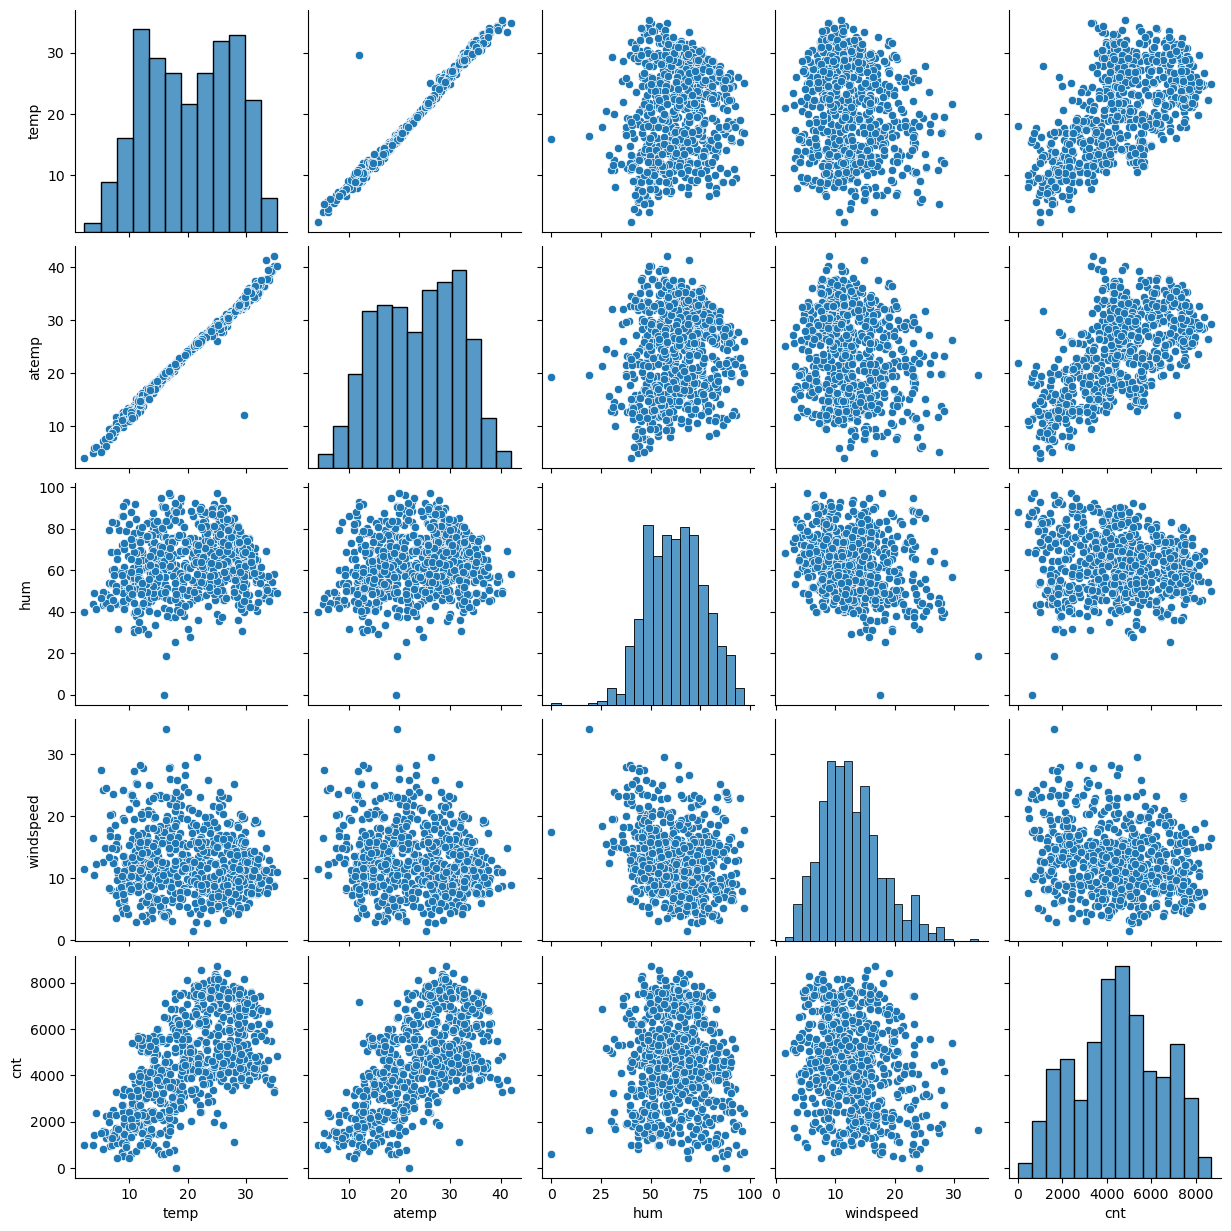

In [13]:
#Check if the numerical variables are linearly associated
sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

### From the pairplots we can say atleast temp and atemp are linearly correlated with count

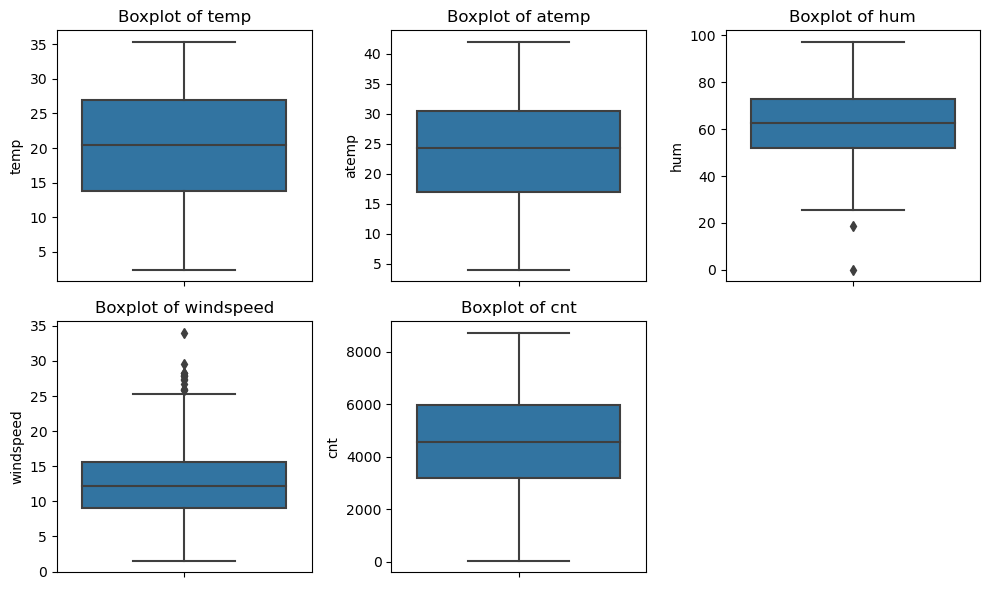

In [14]:
#Check the boxplots to detect the presence of outliers
plt.figure(figsize=(10,6))
for i, j in enumerate(bike[['temp','atemp','hum','windspeed','cnt']].columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = j, data = bike[['temp','atemp','hum','windspeed','cnt']])
    plt.title("Boxplot of "+j)
    plt.tight_layout()

### There are no significant outliers present in the data. Let's try to analyse windspeed above 25 and humidity below 20

In [15]:
bike[bike['windspeed']>=25]

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
44,14-02-2018,Spring,0,Feb,0,Mon,Clear,17.015000,19.91750,37.5833,27.999836,1913
49,19-02-2018,Spring,0,Feb,0,Sat,Clear,16.365847,19.57020,18.7917,34.000021,1635
93,04-04-2018,Summer,0,Apr,0,Mon,Clear,23.506653,27.14645,42.6250,25.833257,3115
94,05-04-2018,Summer,0,Apr,0,Tue,Misty,16.980847,19.91750,64.2083,26.000489,1795
238,27-08-2018,Fall,0,Aug,0,Sat,Misty,27.880000,31.77780,85.0000,25.166339,1115
292,20-10-2018,Winter,0,Oct,0,Thr,Clear,19.509153,23.32625,63.6250,28.292425,4195
377,13-01-2019,Spring,1,Jan,0,Fri,Clear,11.240847,12.46810,50.7500,25.333236,3214
382,18-01-2019,Spring,1,Jan,0,Wed,Clear,12.436653,13.76270,44.3333,27.833743,3376
407,12-02-2019,Spring,1,Feb,0,Sun,Clear,5.227500,5.08290,46.4583,27.417204,1529
420,25-02-2019,Spring,1,Feb,0,Sat,Clear,11.924153,12.78375,39.5833,28.250014,2732


### There are 17 days out of 730 where windspeed is above 25 and they do look genuine outliers, so we won't be ignoring/dropping them

In [16]:
bike[bike['hum']<=20]

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
49,19-02-2018,Spring,0,Feb,0,Sat,Clear,16.365847,19.5702,18.7917,34.000021,1635
68,10-03-2018,Spring,0,Mar,0,Thr,Rain,15.952731,19.2834,0.0000,17.545759,623


### Although 0 humidity is nearly impossible, but other data points look good so we won't be dropping this too since it can be error in calculating the humidity

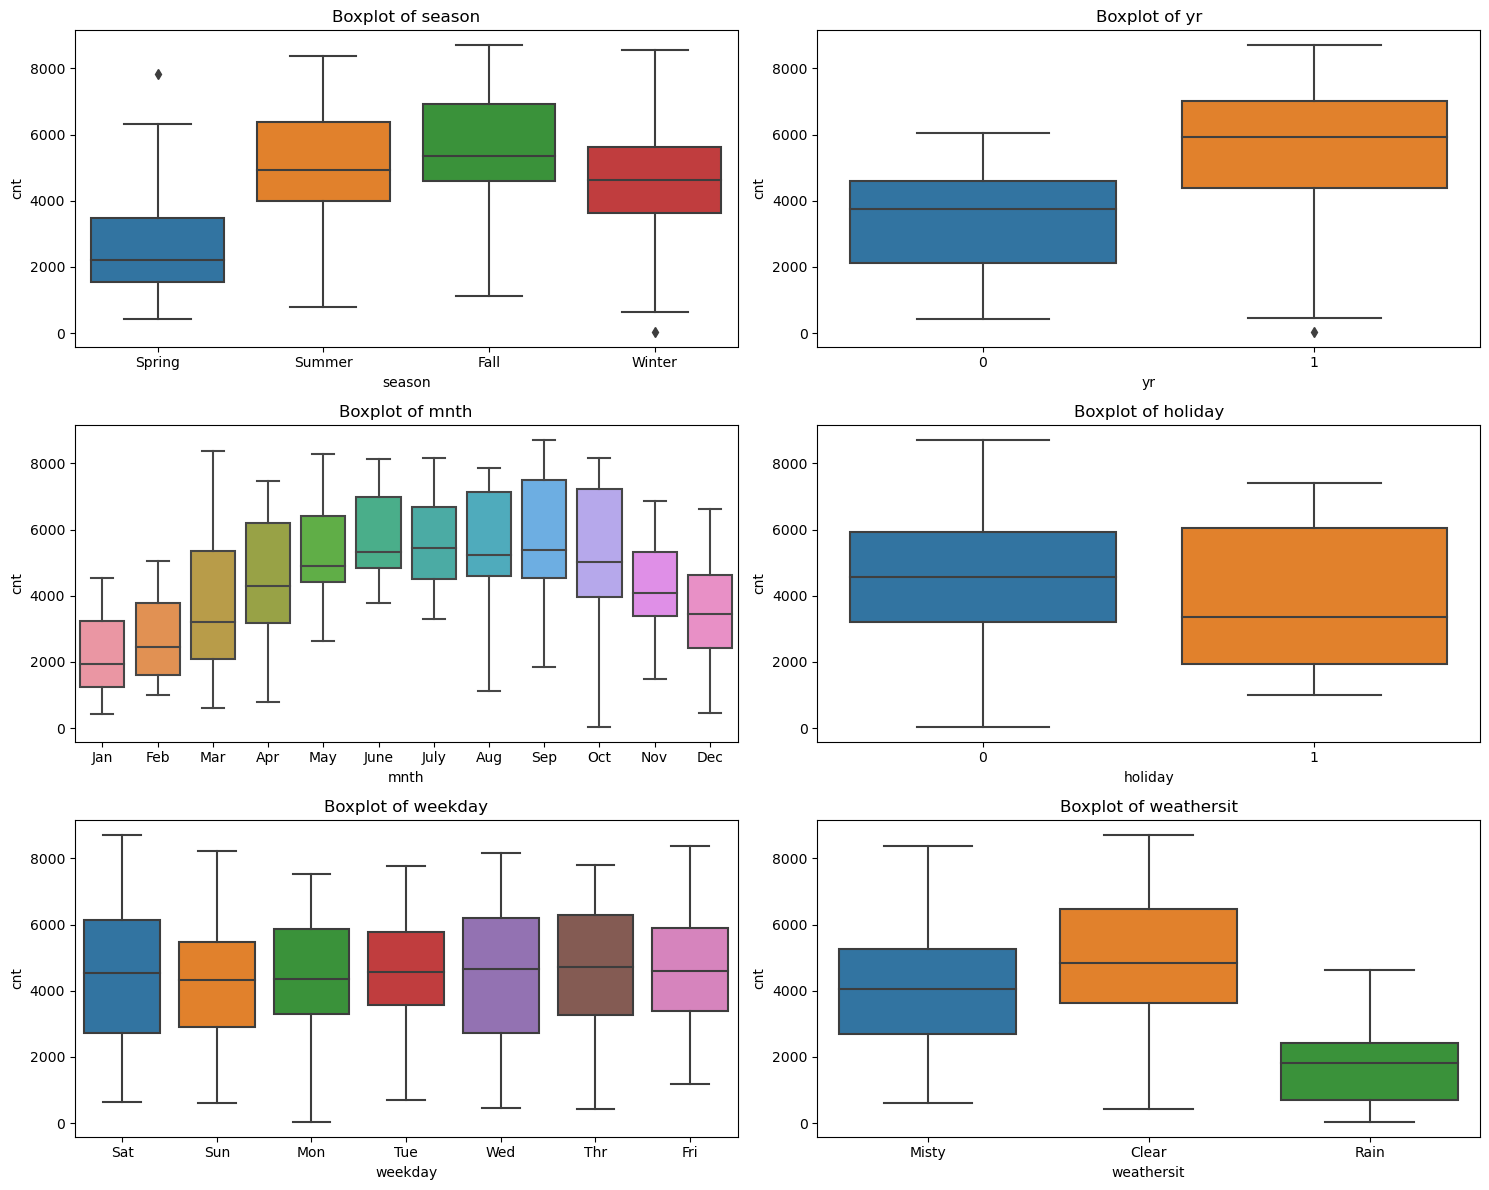

In [17]:
#Check the Categorical variables
plt.figure(figsize=(15,12))
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
for i, j in enumerate(cat_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = j , y = 'cnt', data = bike)
    plt.title("Boxplot of "+j)
    plt.tight_layout()

### Observations

- By season, fall has the highest rentals followed by summer
- By year, 2019 had 2000 median increase in rentals compared to 2018
- By weathersit, clear weather has the highest rentals followed by Misty
- Holidays have lesser rentals than working days, also variation in demand on holidays is huge
- September has the highest rentals followed by October and August
- There is no significant difference in rentals by weekdays

---

# Step 2 : Preparing the Data for Modelling
- Encoding:

    - Converting binary categorical variables to 1/0
    - Other categorical variables to dummy variables
    
- Train Test Split

- Rescaling

---

## Encoding

In [18]:
# Creating dummy varibales
dummy_var = ['season', 'mnth', 'weekday', 'weathersit']

In [19]:
status = pd.get_dummies(bike[dummy_var],drop_first=True, prefix='', prefix_sep='')
status.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
bike = pd.concat([bike,status], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
0,01-01-2018,Spring,0,Jan,0,Sat,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,02-01-2018,Spring,0,Jan,0,Sun,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,03-01-2018,Spring,0,Jan,0,Mon,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,Spring,0,Jan,0,Tue,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,05-01-2018,Spring,0,Jan,0,Wed,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [21]:
bike.drop(dummy_var, axis=1, inplace=True)
bike.head()

,dteday,yr,holiday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
0,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,03-01-2018,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,05-01-2018,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Train Test Split

In [22]:
#Separate X and y
X = bike.drop(['cnt','dteday'], axis = 1)
y = bike['cnt']

In [23]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [24]:
X_train.head()

,yr,holiday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
576,1,0,29.246653,33.1448,70.4167,11.083475,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,10.489153,11.5850,48.3333,23.500518,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,13.803347,16.0977,72.9583,14.707907,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Rescaling

In [25]:
# Min-Max Scaling

scaler = MinMaxScaler()

scale_vars = ['temp', 'atemp', 'hum', 'windspeed']

scaler.fit(X_train[scale_vars])

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_train[scale_vars].head()

,temp,atemp,hum,windspeed
576,0.815169,0.766351,0.725633,0.264686
426,0.442393,0.438975,0.640189,0.255342
728,0.245101,0.200348,0.498067,0.663106
482,0.395666,0.391735,0.504508,0.188475
111,0.345824,0.318819,0.751824,0.380981


In [26]:
X_train.head()

,yr,holiday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
576,1,0,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
atemp,510.0,0.513156,0.212410,0.0,0.332086,0.529718,0.688457,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
Summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
Winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
Aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0


---

# Step 3: Training the Model

---

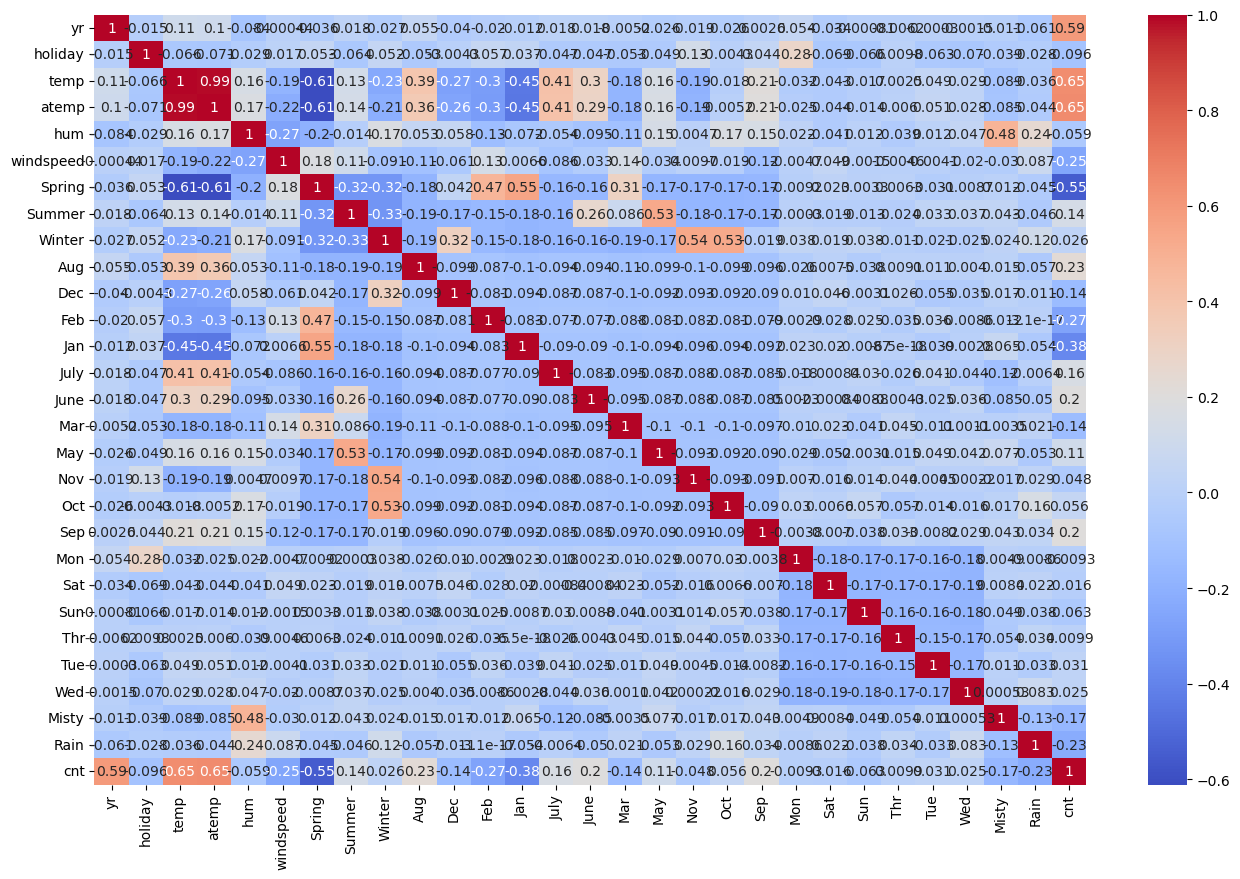

In [28]:
plt.figure(figsize = (16,10))
sns.heatmap(pd.concat([X_train,y_train], axis=1).corr(), cmap="coolwarm", annot=True)
plt.show()

### RFE
Recursive feature elimination

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select  = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 14),
 ('Sun', True, 1),
 ('Thr', False, 9),
 ('Tue', False, 8),
 ('Wed', False, 12),
 ('Misty', True, 1),
 ('Rain', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Jan', 'July', 'Nov', 'Sep', 'Sun', 'Misty', 'Rain'],
      dtype='object')

### Creating Model with RFE suggested 15 columns

In [32]:
X_train_rfe = X_train[col]
X_train_sm_full = sm.add_constant(X_train_rfe)
X_train_sm_full.head()

,const,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Jan,July,Nov,Sep,Sun,Misty,Rain
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


In [33]:
# Fit the model
sm.OLS(y_train,X_train_sm_full).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.44e-191
Time:                        22:00:51   Log-Likelihood:                -4105.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     494   BIC:                             8311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2670.7893    302.036      8.843      0.000    2077.356    3264.223
yr          2002.1298     69.468     28.821      0.000    1865.641    2138.619
holiday     -862.4464    220.515     -3.911      0.000   -1295.710    -429.183
temp        4365.8014    301.339     14.488      0.000    3773.738    4957.865
hum        -1383.6660    323.943     -4.271      0.000   -2020.143    -747.189
windspeed  -1597.8451    221.313     -7.220      0.000   -2032.675   -1163.015
Spring      -479.4741    181.343     -2.644      0.008    -835.772    -123.176
Summer       420.6519    129.549      3.247      0.001     166.118     675.186
Winter       860.0073    153.504      5.603      0.000     558.406    1161.609
Jan         -305.2703    150.691     -2.026      0.043    -601.345      -9.196
July        -459.8999    156.758     -2.934      0.004    -767.894    -151.905
Nov         -207.3086    148.408     -1.397      0.163    -498.898      84.280
Sep          686.2977    143.797      4.773      0.000     403.768     968.827
Sun         -393.7092     98.385     -4.002      0.000    -587.014    -200.405
Misty       -489.7161     89.897     -5.448      0.000    -666.344    -313.088
Rain       -2157.9761    226.085     -9.545      0.000   -2602.182   -1713.770
==============================================================================
Omnibus:                       64.570   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.609
Skew:                          -0.646   Prob(JB):                     2.97e-36
Kurtosis:                       5.456   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the VIF

In [34]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,features,vif
3,hum,29.32
2,temp,16.81
4,windspeed,4.72
5,Spring,4.37
7,Winter,3.78
6,Summer,2.80
13,Misty,2.31
0,yr,2.09
8,Jan,1.67
10,Nov,1.60


Here we can have 4 scenarios:

- High p, High VIF => drop column
- Low p, Low VIF => keep column
- High p, Low VIF => Between the last two scenario, drop this first to see if VIF of others dropped or not
- Low p, High VIF => if VIF is still high after the 3rd step, drop column

Note : Here **p >= 0.05** and **VIF >= 5** is considered **high**

### Creating another model by dropping Nov and Jan because it has High p

In [35]:
X = X_train_rfe.drop(['Nov','Jan'], axis=1)
X.head()

,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,July,Sep,Sun,Misty,Rain
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,1,0


In [36]:
# Creating the model

X_train_sm_full = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm_full)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.12e-192
Time:                        22:00:51   Log-Likelihood:                -4108.6
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     496   BIC:                             8304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2506.1799    295.422      8.483      0.000    1925.746    3086.614
yr          1994.9544     69.659     28.639      0.000    1858.092    2131.817
holiday     -904.8385    219.716     -4.118      0.000   -1336.527    -473.150
temp        4582.9859    288.673     15.876      0.000    4015.813    5150.159
hum        -1410.8074    324.382     -4.349      0.000   -2048.140    -773.474
windspeed  -1565.3252    220.703     -7.092      0.000   -1998.953   -1131.697
Spring      -482.2695    178.894     -2.696      0.007    -833.754    -130.785
Summer       466.4048    128.597      3.627      0.000     213.742     719.068
Winter       864.9511    148.249      5.834      0.000     573.678    1156.224
July        -472.1225    157.182     -3.004      0.003    -780.948    -163.298
Sep          713.5753    143.451      4.974      0.000     431.729     995.421
Sun         -390.2661     98.757     -3.952      0.000    -584.300    -196.232
Misty       -488.3028     90.240     -5.411      0.000    -665.603    -311.003
Rain       -2126.5225    226.594     -9.385      0.000   -2571.725   -1681.320
==============================================================================
Omnibus:                       61.336   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.517
Skew:                          -0.618   Prob(JB):                     4.62e-34
Kurtosis:                       5.387   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [37]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,features,vif
3,hum,28.24
2,temp,16.04
4,windspeed,4.66
5,Spring,4.01
7,Winter,3.34
6,Summer,2.79
11,Misty,2.30
0,yr,2.08
8,July,1.59
9,Sep,1.39


### Creating another model by dropping hum  because it has High VIF

In [38]:
X = X_train_rfe.drop(['Nov','Jan','hum'], axis=1)
X.head()

,yr,holiday,temp,windspeed,Spring,Summer,Winter,July,Sep,Sun,Misty,Rain
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.380981,0,1,0,0,0,0,1,0


In [39]:
# Creating the model

X_train_sm_full = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm_full)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.45e-189
Time:                        22:00:51   Log-Likelihood:                -4118.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     497   BIC:                             8317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1812.8494    253.162      7.161      0.000    1315.449    2310.250
yr          2029.3357     70.445     28.807      0.000    1890.929    2167.743
holiday     -914.4114    223.630     -4.089      0.000   -1353.788    -475.035
temp        4265.0289    284.251     15.004      0.000    3706.547    4823.511
windspeed  -1285.1499    214.863     -5.981      0.000   -1707.302    -862.998
Spring      -569.5094    180.942     -3.147      0.002    -925.015    -214.004
Summer       413.1801    130.301      3.171      0.002     157.172     669.188
Winter       737.1376    147.903      4.984      0.000     446.546    1027.729
July        -427.9518    159.656     -2.680      0.008    -741.635    -114.268
Sep          660.7021    145.488      4.541      0.000     374.854     946.550
Sun         -420.2169    100.277     -4.191      0.000    -617.235    -223.199
Misty       -714.4638     75.069     -9.517      0.000    -861.955    -566.973
Rain       -2516.2679    211.839    -11.878      0.000   -2932.478   -2100.058
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [40]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,features,vif
2,temp,5.14
3,windspeed,4.60
5,Summer,2.24
4,Spring,2.11
0,yr,2.07
6,Winter,1.81
7,July,1.59
10,Misty,1.56
8,Sep,1.34
9,Sun,1.18


### Creating another model by dropping windspeed because it has High VIF
- Not dropping temp as it is highly correlated with count

In [41]:
X = X_train_rfe.drop(['Nov','Jan','hum', 'windspeed'], axis=1)
X.head()

,yr,holiday,temp,Spring,Summer,Winter,July,Sep,Sun,Misty,Rain
576,1,0,0.815169,0,0,0,1,0,0,0,0
426,1,0,0.442393,1,0,0,0,0,0,1,0
728,1,0,0.245101,1,0,0,0,0,1,0,0
482,1,0,0.395666,0,1,0,0,0,0,1,0
111,0,0,0.345824,0,1,0,0,0,0,1,0


In [42]:
# Creating the model

X_train_sm_full = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm_full)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.83e-183
Time:                        22:00:52   Log-Likelihood:                -4135.9
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     498   BIC:                             8347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1384.1158    251.137      5.511      0.000     890.697    1877.535
yr          2020.8888     72.849     27.741      0.000    1877.760    2164.017
holiday     -938.7614    231.268     -4.059      0.000   -1393.142    -484.381
temp        4368.6394    293.462     14.887      0.000    3792.063    4945.216
Spring      -651.3400    186.617     -3.490      0.001   -1017.994    -284.686
Summer       327.7238    133.961      2.446      0.015      64.526     590.921
Winter       747.0480    152.970      4.884      0.000     446.502    1047.594
July        -430.3682    165.136     -2.606      0.009    -754.817    -105.920
Sep          698.3674    150.341      4.645      0.000     402.986     993.749
Sun         -420.5906    103.719     -4.055      0.000    -624.371    -216.810
Misty       -699.6384     77.603     -9.016      0.000    -852.109    -547.168
Rain       -2644.4157    217.987    -12.131      0.000   -3072.703   -2216.128
==============================================================================
Omnibus:                       70.260   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.572
Skew:                          -0.672   Prob(JB):                     5.61e-43
Kurtosis:                       5.712   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [43]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,features,vif
2,temp,4.27
0,yr,2.06
4,Summer,1.95
5,Winter,1.61
6,July,1.59
9,Misty,1.56
3,Spring,1.43
7,Sep,1.34
8,Sun,1.18
10,Rain,1.07


### Now we don't have any feature with High p or High VIF

# Step 4: Residual Analysis

In [44]:
y_train_pred = lr_model.predict(X_train_sm_full)
y_train_pred.head()

576    6535.813886
426    3986.681844
728    3403.832329
482    4761.612917
111    2522.982512
dtype: float64

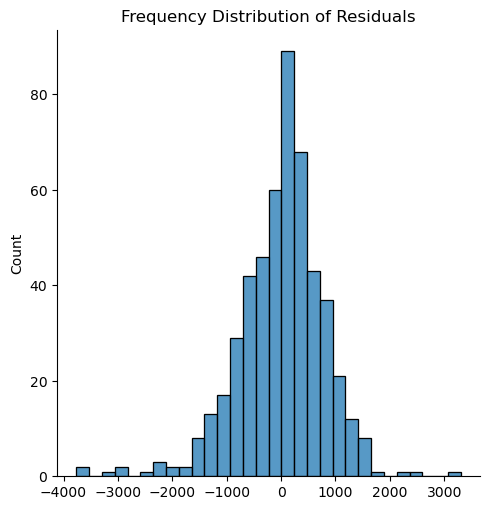

In [45]:
res = y_train - y_train_pred
sns.displot(res, bins=30)
plt.title('Frequency Distribution of Residuals')
plt.show()

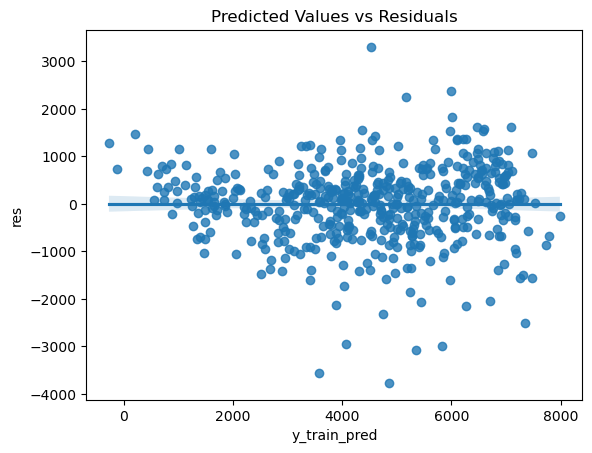

In [46]:
sns.regplot(x=y_train_pred,y=res)
plt.title('Predicted Values vs Residuals')
plt.xlabel('y_train_pred')        
plt.ylabel('res')   
plt.show()

### Observations:

- Residual errors follow normal distribution, i.e. the mean is 0
- Predicted Values vs Residuals shows no trend

# Step 4: Predictions & Evaluation on the Test Set

In [47]:
# transforming the test data set

X_test[scale_vars] = scaler.transform(X_test[scale_vars])
X_test[scale_vars].head()

,temp,atemp,hum,windspeed
184,0.831783,0.769660,0.657364,0.084219
535,0.901354,0.842587,0.610133,0.153728
299,0.511964,0.496145,0.837699,0.334206
221,0.881625,0.795343,0.437098,0.339570
152,0.817246,0.741471,0.314298,0.537414


In [48]:
X_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Misty,Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.532847,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.233187,0.217401,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.713308,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# add a constant

X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Jan,July,Nov,Sep,Sun,Misty,Rain
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0


In [50]:
# creating the test set as per the train set on which the model is built
X_test_sm = X_test_sm.drop(['Nov','Jan','hum', 'windspeed'], axis =1)

In [51]:
# predict

y_test_pred = lr_model.predict(X_test_sm)

In [52]:
# evaluate the model

r2_score(y_true= y_test, y_pred= y_test_pred)

0.8115878724384958

### Model Evaluation

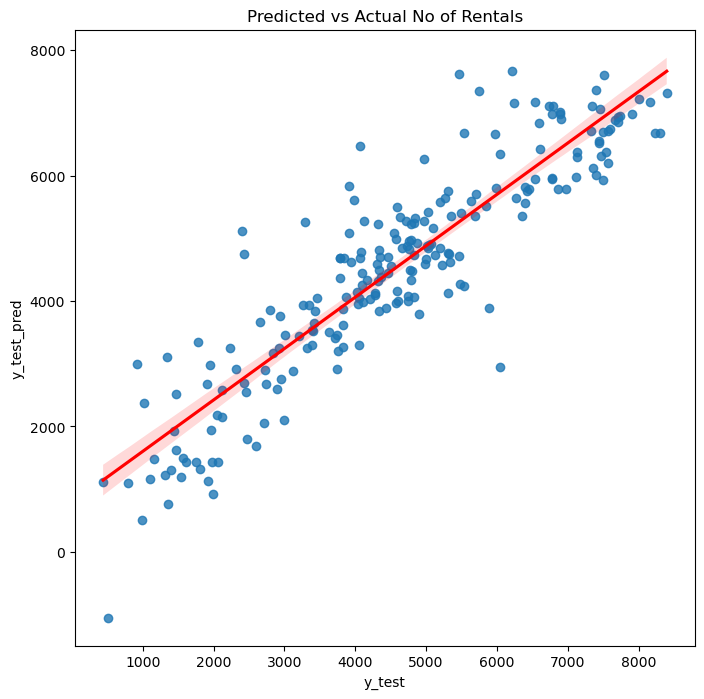

In [53]:
plt.figure(figsize=[8,8])
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color": "red"});
plt.xlabel('y_test')        
plt.ylabel('y_test_pred')
plt.title('Predicted vs Actual No of Rentals');

In [54]:
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
Adj_rsquared_train = 1 - (1-rsquared_train) * (len(y_train_pred)-1)/(len(y_train_pred)-X.shape[1]-1)
Adj_rsquared_test = 1 - (1-rsquared_test) * (len(y_test_pred)-1)/(len(y_test_pred)-X_test[col].shape[1]-1)
print('R-squared for train data:',round(rsquared_train,3))
print('Adjusted R-squared for train data:',round(Adj_rsquared_train,3))
print('R-squared for test data:',round(rsquared_test,3))
print('Adjusted R-squared for test data:',round(Adj_rsquared_test,3))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.829
Adjusted R-squared for train data: 0.826
R-squared for test data: 0.812
Adjusted R-squared for test data: 0.798
Mean Squared Error 680621.878


### Difference between Adjusted R squared value between Train and Test is 2.8%, which can be considered good

### Top Features

In [55]:
# Coefficients and intercept

lr_model.params.sort_values(ascending=False)

temp       4368.639370
yr         2020.888840
const      1384.115819
Winter      747.048000
Sep         698.367431
Summer      327.723759
Sun        -420.590597
July       -430.368213
Spring     -651.340030
Misty      -699.638403
holiday    -938.761398
Rain      -2644.415685
dtype: float64

### Conclusion

### We can see that the equation of our best fitted line is:

`cnt` = 1384.115819 + 4368.639370 `temp` + 2020.888840 `yr` + 747.048000 `Winter` + 698.367431 `Sep` + 327.723759 `Summer` - 420.590597 `Sun` - 430.368213 `July` - 651.340030 `Spring` - 699.638403 `Misty` - 938.761398 `holiday` - 2644.415685 `Rain`